/tmp/ipykernel_56/3557360337.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(FILE_NAME, encoding_errors='replace')


Roll Number: 102303675
ar: 0.2500
br: 0.3000
------------------------------
Lambda: 0.003467
Mu: 19.885392
c: 0.031896
------------------------------
R-squared: 0.9636


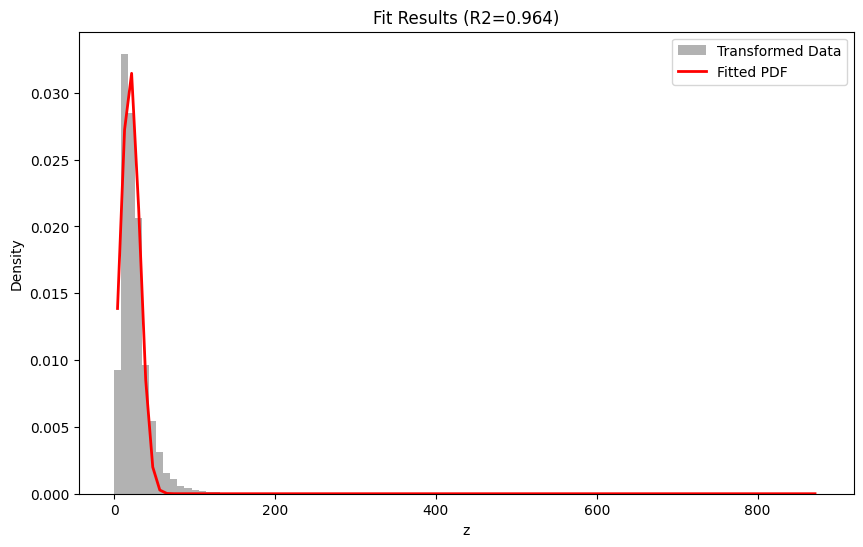

In [7]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

FILE_NAME = '/kaggle/input/india-air-quality-data/data.csv'
ROLL_NUM = 102303675

df = pd.read_csv(FILE_NAME, encoding_errors='replace')
x = df['no2'].dropna().values

# Step 1
r = ROLL_NUM
ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)
z = x + ar * np.sin(br * x)

def pdf_func(z, c, lam, mu):
    return c * np.exp(-lam * (z - mu)**2)

# Step 2
hist_y, hist_edges = np.histogram(z, bins=100, density=True)
hist_x = (hist_edges[:-1] + hist_edges[1:]) / 2

p0 = [1.0, 0.001, np.mean(z)]
lower_bounds = [0, 0, -np.inf]
upper_bounds = [np.inf, np.inf, np.inf]

params, _ = curve_fit(pdf_func, hist_x, hist_y, p0=p0, bounds=(lower_bounds, upper_bounds), maxfev=10000)

c_val, lam_val, mu_val = params

y_pred = pdf_func(hist_x, *params)
r2 = r2_score(hist_y, y_pred)

# Output
print(f"Roll Number: {r}")
print(f"ar: {ar:.4f}")
print(f"br: {br:.4f}")
print("-" * 30)
print(f"Lambda: {lam_val:.6f}")
print(f"Mu: {mu_val:.6f}")
print(f"c: {c_val:.6f}")
print("-" * 30)
print(f"R-squared: {r2:.4f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(z, bins=100, density=True, alpha=0.6, color='gray', label='Transformed Data')
plt.plot(hist_x, y_pred, 'r-', linewidth=2, label='Fitted PDF')
plt.xlabel('z')
plt.ylabel('Density')
plt.title(f'Fit Results (R2={r2:.3f})')
plt.legend()
plt.show()